In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [110]:
train=pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
test=pd.read_csv('/kaggle/input/bigmart-sales-data/Test.csv')
train['trainortest']='train'
test['trainortest']='test'


In [111]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,trainortest
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,train
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train


In [112]:
df=pd.concat([train,test],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,trainortest
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [113]:
test.shape

(5681, 12)

In [114]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
trainortest                     0
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  trainortest                14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [116]:
df.shape

(14204, 13)

In [117]:
df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
trainortest                      2
dtype: int64

In [118]:
#filling missing value in outletsize using outlet type
p=df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode()[0] )
p
miss=df['Outlet_Size'].isnull()
df.loc[miss,'Outlet_Size']=df.loc[miss,'Outlet_Type'].apply(lambda x:p[x])
df.Outlet_Size.isnull().sum()

0

In [119]:
#filling missing values in itemweight using item identifier
s=df.pivot_table(columns='Item_Identifier',values='Item_Weight')

y=df.Item_Weight.isnull()
df.loc[y,'Item_Weight']=df.loc[y,'Item_Identifier'].apply(lambda x:s[x])



In [120]:
df.Item_Weight.isnull().sum()

0

In [121]:
#visibility of the product cant be zero
v = df.pivot_table(values='Item_Visibility',columns='Item_Identifier')
missv=df.Item_Visibility==0
df.loc[missv,'Item_Visibility']=df.loc[missv,'Item_Identifier'].apply(lambda x:v[x])




In [122]:
#checking for duplicate values
df.duplicated().sum()

0

In [123]:
#Treating some columns in item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
df.Item_Fat_Content.value_counts()


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [124]:

#it would make sense if we know how many years the store is running ,some feature engineering
df['Outlet_Running_Years']=2013-df.Outlet_Establishment_Year
df['Outlet_Running_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Running_Years, dtype: float64

In [125]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
trainortest                   object
Outlet_Running_Years           int64
dtype: object

In [126]:
#seperating features to numerical and categorical
NF=df.columns[df.dtypes=='float']
CF=df.columns[df.dtypes=='object']


In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

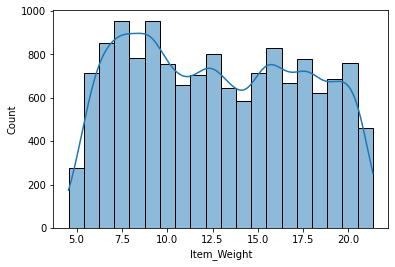

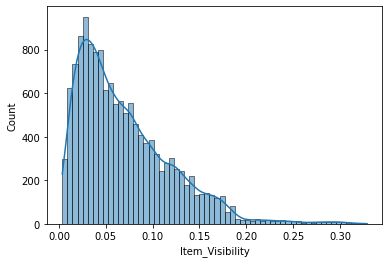

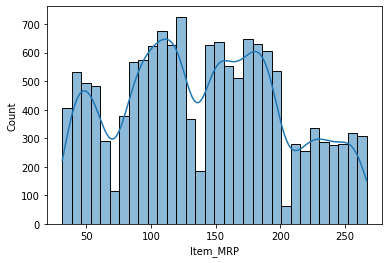

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

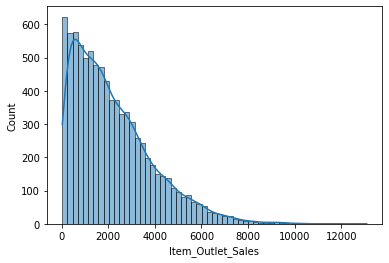

In [128]:
#univariate analysis of numerical variables
sns.histplot(df.Item_Weight,bins=20,kde=True)
plt.show()
sns.histplot(df.Item_Visibility,kde=True)
plt.show()
sns.histplot(df.Item_MRP,kde=True)
plt.show()
sns.histplot(df.Item_Outlet_Sales,kde=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


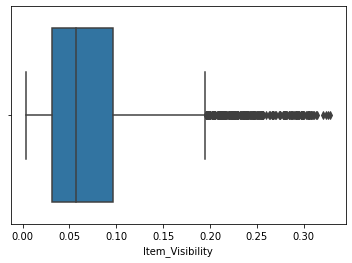

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Outlet_Sales'>

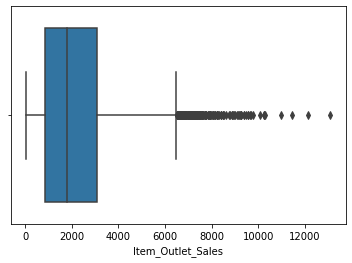

In [129]:
#we are having outliners in item visibility and item outlet sales 
sns.boxplot(df.Item_Visibility)
plt.show()
sns.boxplot(df.Item_Outlet_Sales)

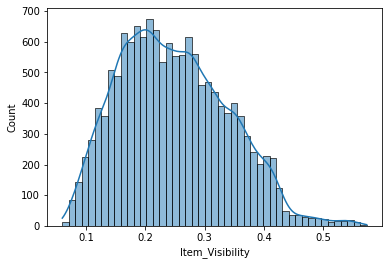

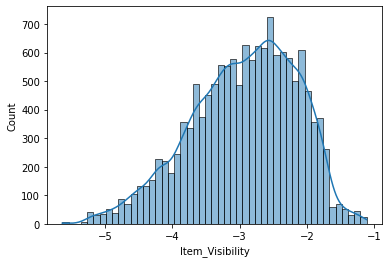

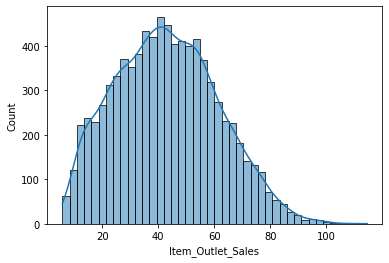

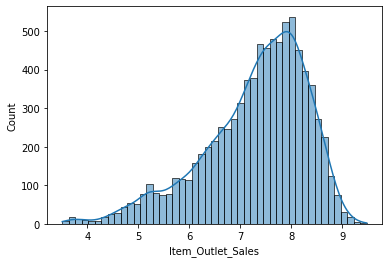

In [130]:
#we will go with square root transformation for both features
sns.histplot(np.sqrt(df.Item_Visibility),kde=True)
plt.show()
sns.histplot(np.log(df.Item_Visibility),kde=True)
plt.show()
sns.histplot(np.sqrt(df.Item_Outlet_Sales),kde=True)
plt.show()
sns.histplot(np.log(df.Item_Outlet_Sales),kde=True)
plt.show()

In [131]:
#removing the skewness of the data 
df.Item_Visibility=np.sqrt(df.Item_Visibility)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


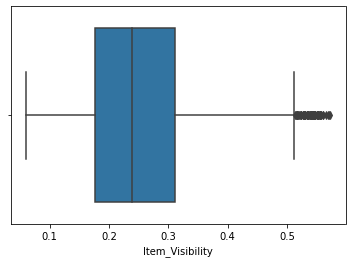

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


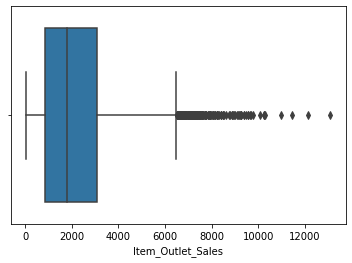

In [132]:
#outliners are relatively decreased
sns.boxplot(df.Item_Visibility)
plt.show()
sns.boxplot(df.Item_Outlet_Sales)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Running_Years', ylabel='count'>

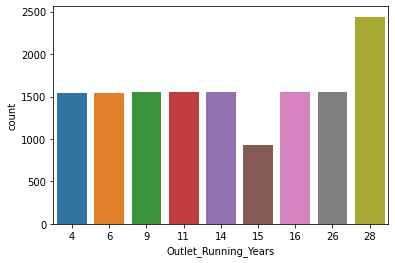

In [133]:
sns.countplot(df.Outlet_Running_Years)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


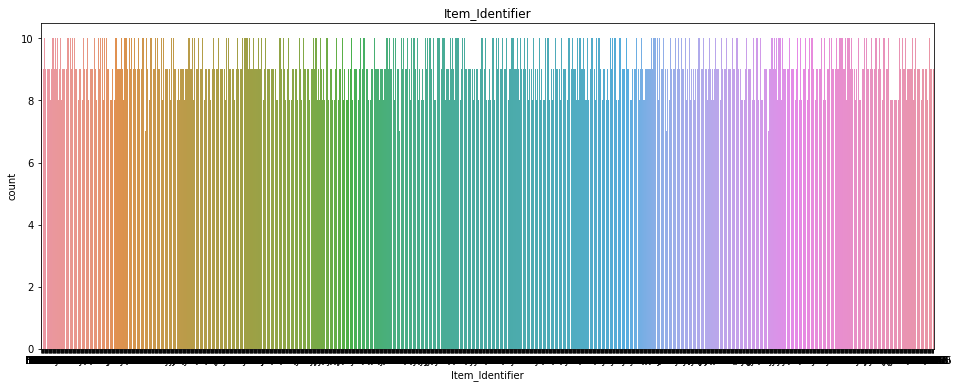

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


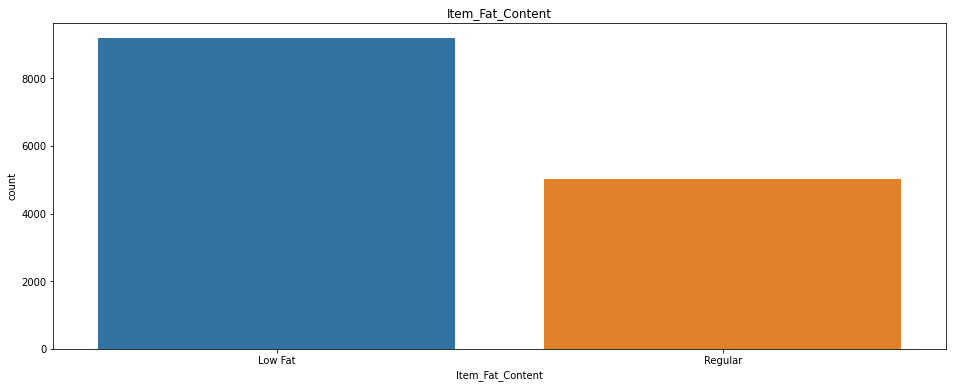

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


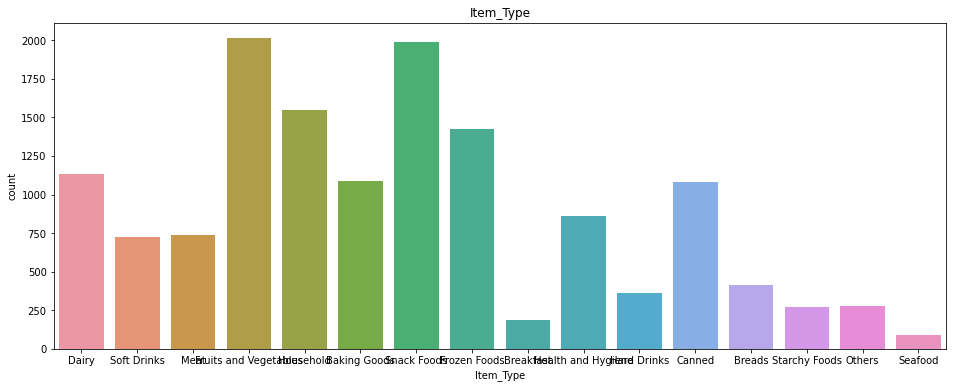

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


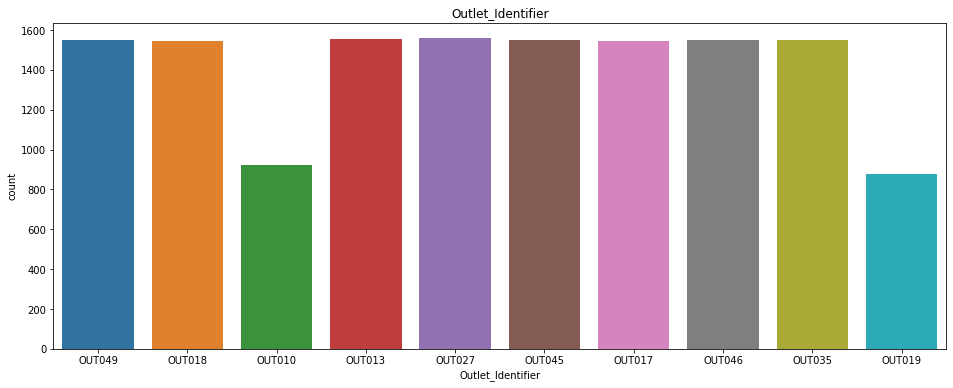

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


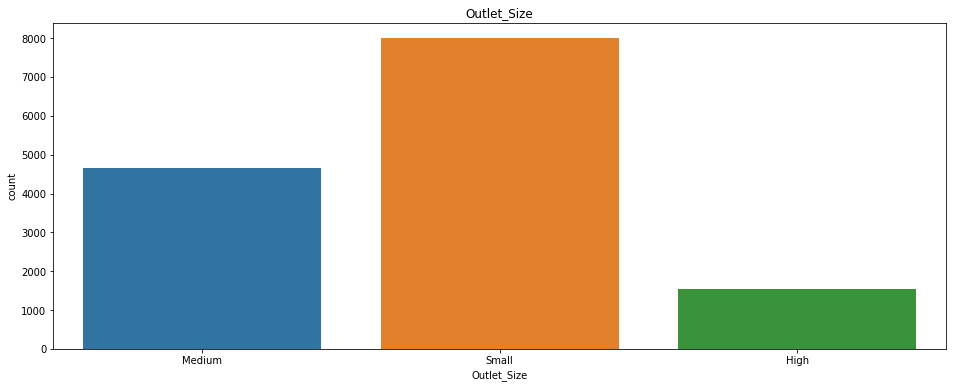

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


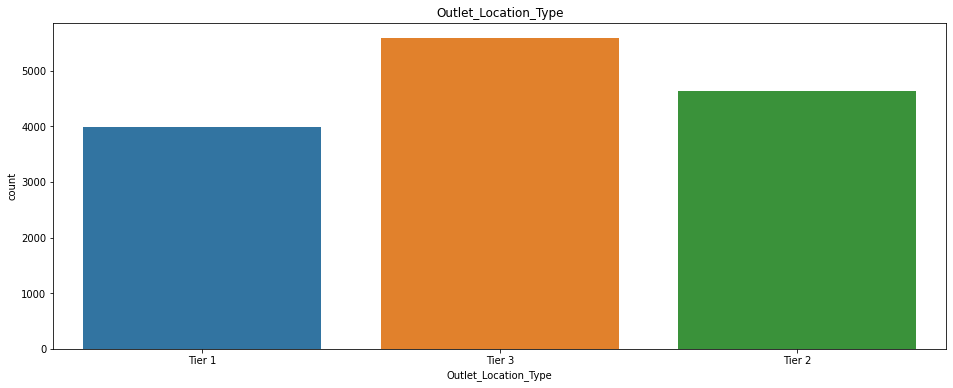

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


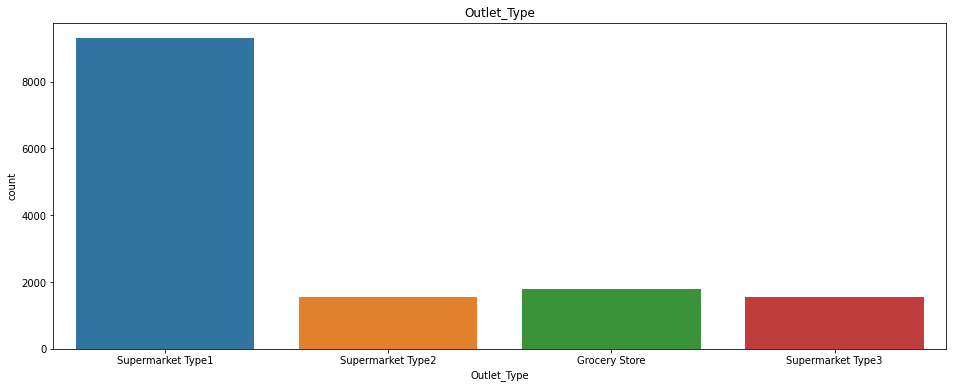

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


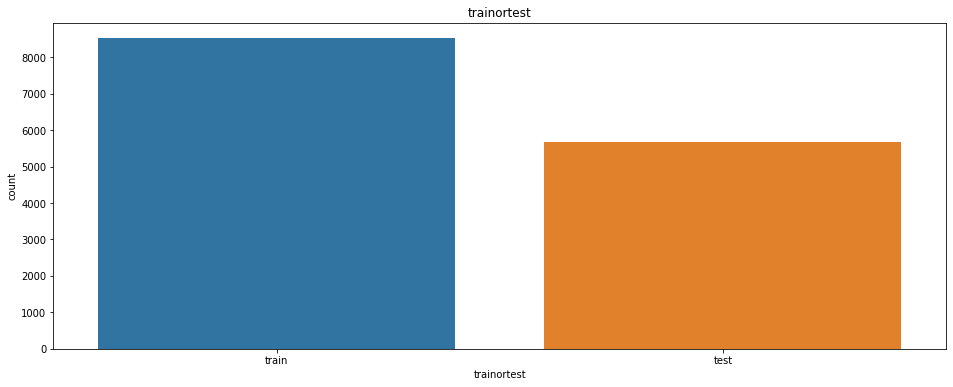

In [134]:
#univariate analysis of categorical variables

for i in CF:
    plt.figure(figsize=(16,6))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

In [135]:
#forming new categorical feature from item identifier
df['New_Item_Type']=df.Item_Identifier.apply(lambda x:x[0:2])
df['New_Item_Type']=df['New_Item_Type'].replace({'FD':'Food','DR':'Drinks','NC':'Non-consumable'})




In [136]:
#changing fat content for non consumable
df['Item_Fat_Content'][df['New_Item_Type']=='Non-consumable']='Non-edible'


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


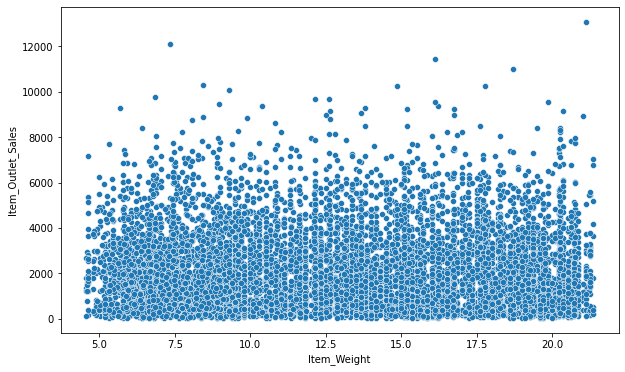

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


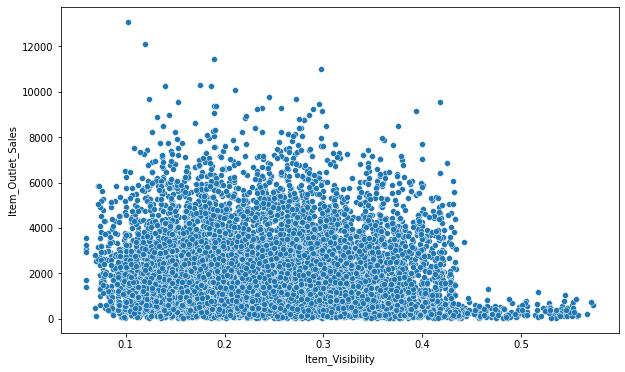

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


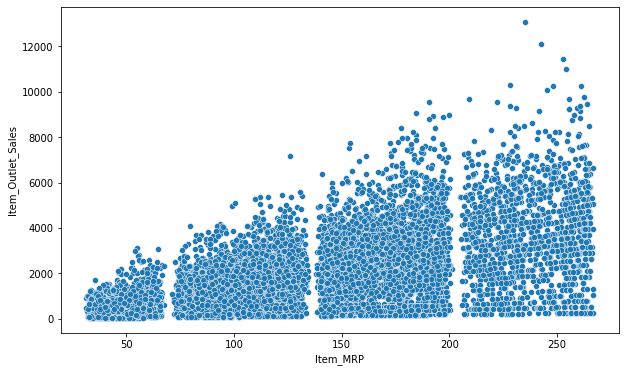

In [137]:
#bivariate analysis of numerical features
#item mrp shows linear relation with item sales
plt.figure(figsize=(10,6))
sns.scatterplot(df.Item_Weight,df.Item_Outlet_Sales)
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(df.Item_Visibility,df.Item_Outlet_Sales)
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(df.Item_MRP,df.Item_Outlet_Sales)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


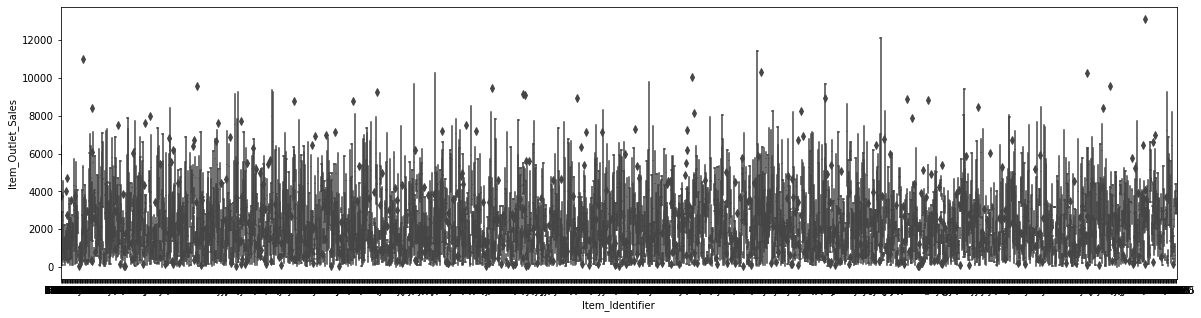

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


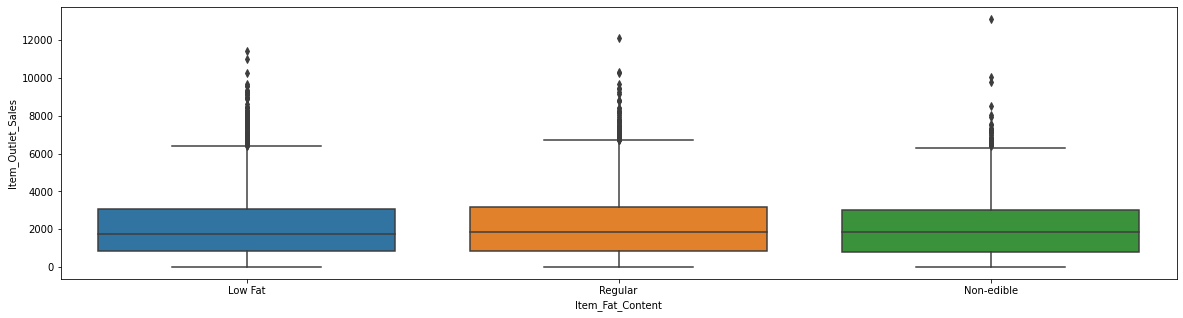

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


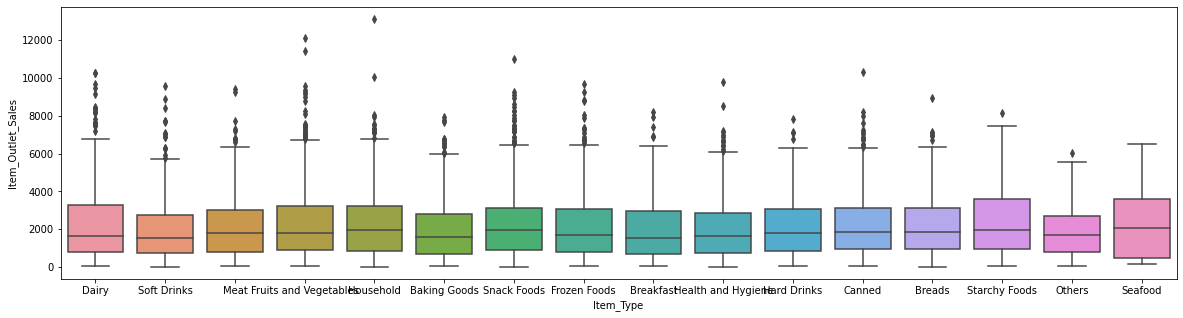

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


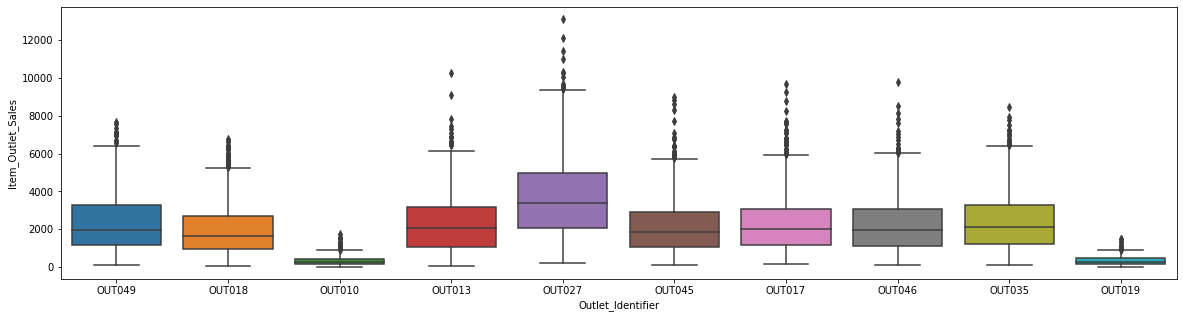

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


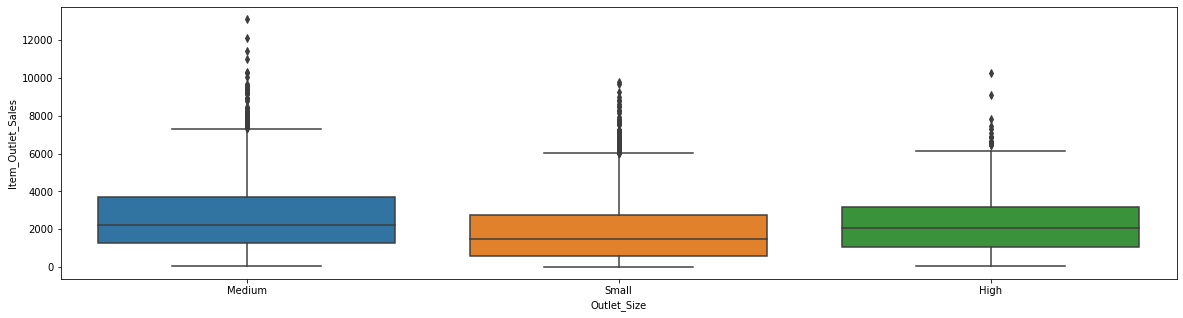

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


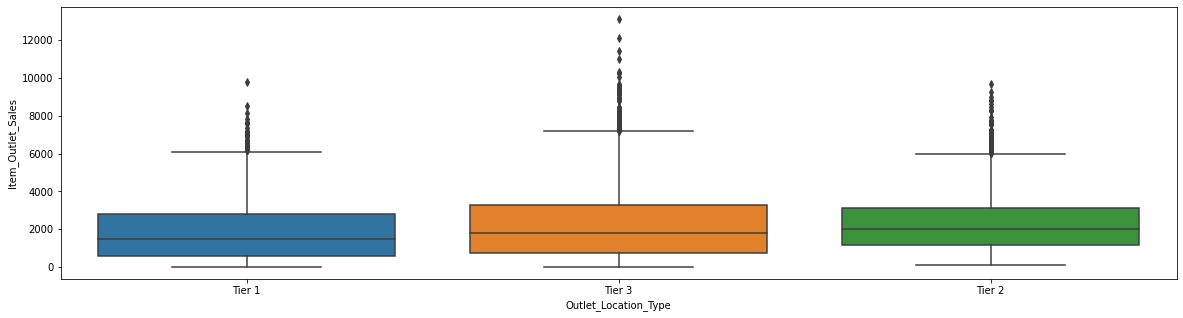

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


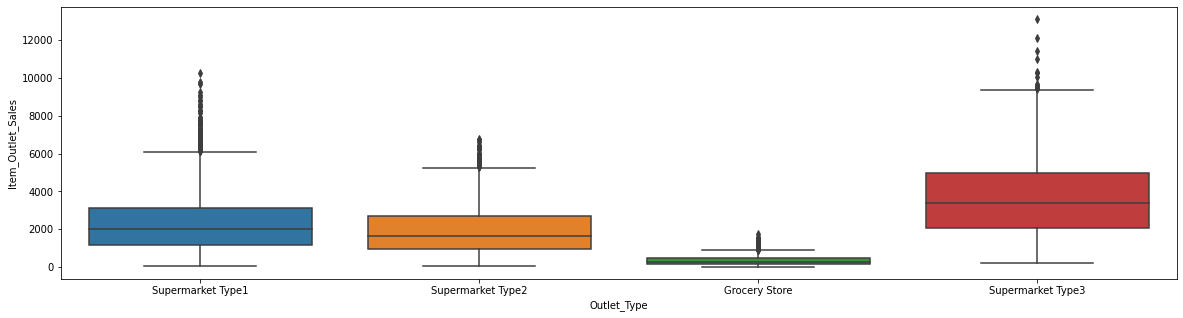

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


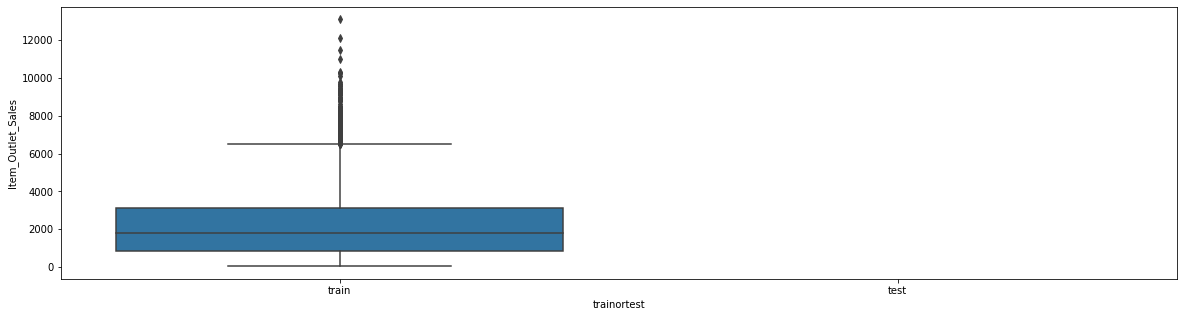

In [138]:
#bivariate analysis categorical variables
for i in CF:
    plt.figure(figsize=(20,5))
    sns.boxplot(df[i],df['Item_Outlet_Sales'])
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='New_Item_Type', ylabel='Item_Outlet_Sales'>

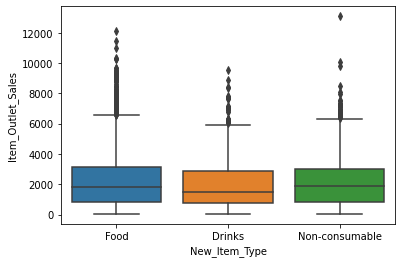

In [139]:
sns.boxplot(df['New_Item_Type'],df['Item_Outlet_Sales'])

In [140]:
#splitting into train and test and need to remove outletestablsihmentyear and trainortest columns
traindf=df[df['trainortest']=='train'].drop(['trainortest','Outlet_Establishment_Year'],axis=1)
testdf=df[df['trainortest']=='test'].drop(['trainortest','Outlet_Establishment_Year'],axis=1)



In [141]:
#removing itemoutletsales from test
testdf.drop('Item_Outlet_Sales',inplace=True,axis=1)


In [142]:
#splitting train to x and y
traindf
X=traindf.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
Y_train=traindf['Item_Outlet_Sales']
X_=testdf.drop('Item_Identifier',axis=1)
X_

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Running_Years,New_Item_Type
8523,20.750,Low Fat,0.086976,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14,Food
8524,8.300,Regular,0.196030,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,6,Food
8525,14.600,Non-edible,0.315555,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,15,Non-consumable
8526,7.315,Low Fat,0.124050,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,6,Food
8527,13.600,Regular,0.344383,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28,Food
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,Regular,0.116174,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,16,Food
14200,7.600,Regular,0.378141,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,4,Food
14201,10.000,Non-edible,0.271162,Health and Hygiene,118.7440,OUT045,Small,Tier 2,Supermarket Type1,11,Non-consumable
14202,15.300,Regular,0.297288,Canned,214.6218,OUT017,Small,Tier 2,Supermarket Type1,6,Food


In [143]:
#one hot encoding on train data
m=pd.get_dummies(X[['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']])
n=X[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Running_Years']]
X_train=pd.concat([m,n],axis=1)
X_train


,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Running_Years
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,9.300,0.126678,249.8092,14
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,5.920,0.138846,48.2692,4
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,17.500,0.129461,141.6180,14
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,19.200,0.133545,182.0950,15
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,8.930,0.098893,53.8614,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,6.865,0.238293,214.5218,26
8519,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,8.380,0.216754,108.1570,11
8520,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,10.600,0.187580,85.1224,9
8521,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,7.210,0.381078,103.1332,4


In [144]:
p=pd.get_dummies(X_[['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']])
q=X_[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Running_Years']]
X_test=pd.concat([p,q],axis=1)
X_test


,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Running_Years
8523,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,20.750,0.086976,107.8622,14
8524,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,8.300,0.196030,87.3198,6
8525,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,14.600,0.315555,241.7538,15
8526,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,7.315,0.124050,155.0340,6
8527,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,13.600,0.344383,234.2300,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,10.500,0.116174,141.3154,16
14200,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,7.600,0.378141,169.1448,4
14201,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,10.000,0.271162,118.7440,11
14202,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,15.300,0.297288,214.6218,6


In [145]:
X_test

,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-consumable,Item_Weight,Item_Visibility,Item_MRP,Outlet_Running_Years
8523,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,20.750,0.086976,107.8622,14
8524,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,8.300,0.196030,87.3198,6
8525,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,14.600,0.315555,241.7538,15
8526,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,7.315,0.124050,155.0340,6
8527,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,13.600,0.344383,234.2300,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,10.500,0.116174,141.3154,16
14200,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,7.600,0.378141,169.1448,4
14201,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,10.000,0.271162,118.7440,11
14202,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,15.300,0.297288,214.6218,6


In [146]:
Y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [147]:
#fitting linear model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
predictions=model.predict(X_train)
print(mean_squared_error(Y_train,predictions))
print(r2_score(Y_train,predictions))


1271045.2970384995
0.563484572830369


In [148]:
#predicting target for the test data
model.predict(X_test)


array([1855.68213479, 1569.63845186, 1872.71550084, ..., 1806.61342527,
       3536.75801292, 1264.2500226 ])

In [154]:
t=model.predict(X_test)
testdf['Item_Identifier']

8523     FDW58
8524     FDW14
8525     NCN55
8526     FDQ58
8527     FDY38
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 5681, dtype: object

In [156]:
finalpredictions=pd.DataFrame({'ItemIdentifier':testdf['Item_Identifier'],'Sales':t})
finalpredictions



,ItemIdentifier,Sales
8523,FDW58,1855.682135
8524,FDW14,1569.638452
8525,NCN55,1872.715501
8526,FDQ58,2590.618540
8527,FDY38,5182.518223
...,...,...
14199,FDB58,2316.534706
14200,FDD47,2438.485573
14201,NCO17,1806.613425
14202,FDJ26,3536.758013


In [157]:
#saving file to csv
finalpredictions.to_csv('mysubmission.csv',index=True)